# Hypervector Capacity

These are experiments exploring the capabilities of hypervectors. 



## Storing values in hypervectors

Many machine learning algorithms require statistical analysis of input streams, but tokens...

Here, comparing values stored in hypervectors to true values. 

In [1]:
import random_idx
import utils
import pickle
import time

from pylab import *
%matplotlib inline

height has been deprecated.

2016-04-02 15:48


In [2]:
alice_text_name="preprocessed_texts/AliceInWonderland.txt"
alice_text = utils.load_text(alice_text_name)

N = 10000
letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

### Storing information about letter statistics in hypervectors



In [3]:
alice_vector1 = np.zeros(N)
for l in alice_text:
    alice_vector1 += letter_vectors[random_idx.alphabet.find(l), :]
alice_vector1 = alice_vector1 / len(alice_text)
hyp_prob1 = np.dot(letter_vectors, alice_vector1.T) / N

In [4]:
letter_counts = np.zeros(len(random_idx.alphabet))

for i,letter in enumerate(random_idx.alphabet):
    letter_counts[i] = alice_text.count(letter)

letter_prob = letter_counts / sum(letter_counts)

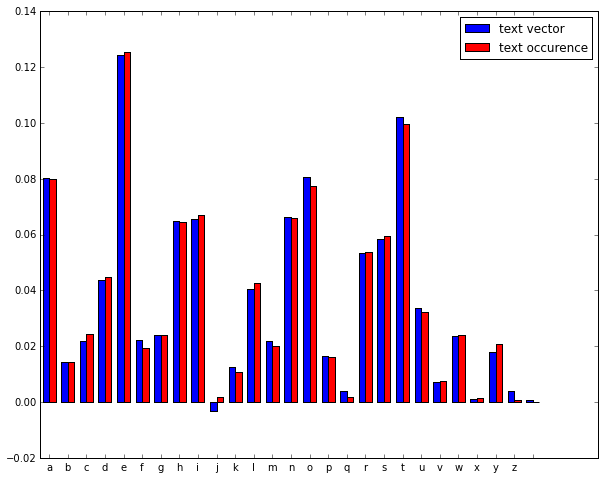

In [5]:
figure(figsize=(10,8))

bar(arange(len(hyp_prob1))+0.15, hyp_prob1, width=0.35, color='b', label='text vector')
bar(arange(len(letter_prob))+0.5, letter_prob, width=0.35, color='r', label='text occurence')

ax = gca()

ax.set_xticks(arange(len(hyp_prob1))+0.5)
th = ax.set_xticklabels(list(random_idx.alphabet))

legend()

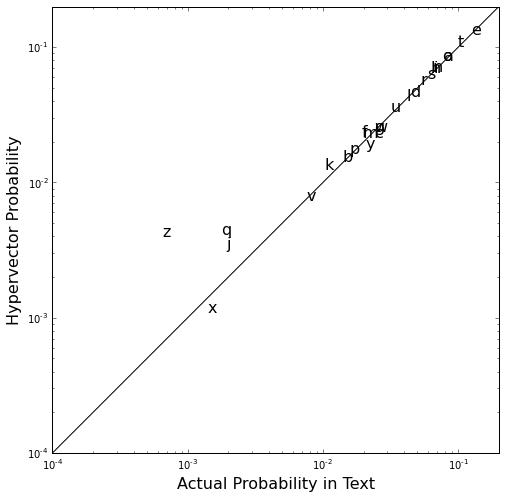

In [6]:
figure(figsize=(8,8))
cla()
plot([0, 0.2], [0, 0.2], 'k')

for i,l in enumerate(random_idx.alphabet):
    if letter_prob[i] < 1e-7:
        continue
        
    text(letter_prob[i], abs(hyp_prob1[i]), l, fontsize=16) # abs to deal with potential negatives
ax = gca()
ax.set_xlim([1e-4, 0.2])
ax.set_xscale('log')
ax.set_ylim([1e-4, 0.2])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


In [7]:
N=10000
alice_vector_log = np.zeros(N)
letter_val = np.zeros(len(alice_text))
for il,l in enumerate(alice_text):
    letter_val[il] = np.dot(letter_vectors[random_idx.alphabet.find(l),:], alice_vector_log.T) / N
    alice_vector_log += 1.0 / (np.exp(letter_val[il])) * letter_vectors[random_idx.alphabet.find(l),:]
    #if letter_val[il] < 1:
    #    alice_vector_log += letter_vectors[random_idx.alphabet.find(l),:]
    #else:
    #    alice_vector_log += 1.0 / letter_val[il] * letter_vectors[random_idx.alphabet.find(l),:]
        #alice_vector_log += 1.0 * letter_vectors[random_idx.alphabet.find(l),:]
    
alice_vector_log = alice_vector_log
hyp_prob_log = np.dot(letter_vectors, alice_vector_log.T) / N

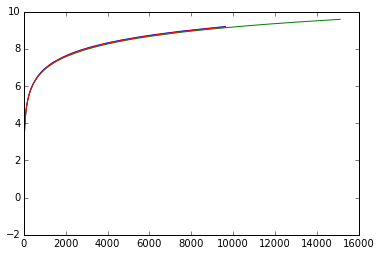

In [45]:
import re
idxs1 = np.array([match.start() for match in re.finditer('a', alice_text)])
idxs2 = np.array([match.start() for match in re.finditer('e', alice_text)])

plot(letter_val[idxs1])
plot(letter_val[idxs2])
#plot(20*np.cumsum(1.0/(1+arange(len(idxs1)))))
plot(np.log(arange(len(idxs1))+1))

In [9]:
np.log(idxs1)/letter_val[idxs1]

array([ 44.22329161,   3.171311  ,   2.7537447 , ...,   1.27173741,
         1.27173966,   1.27172739])

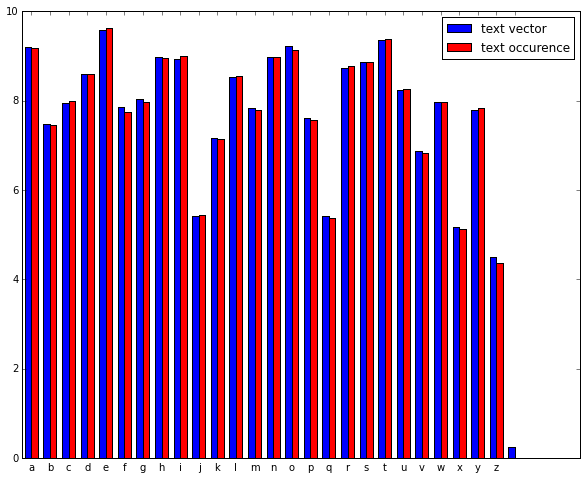

In [10]:
figure(figsize=(10,8))

bar(arange(len(hyp_prob_log))+0.15, hyp_prob_log, width=0.35, color='b', label='text vector')
bar(arange(len(letter_prob))+0.5, np.log(letter_counts), width=0.35, color='r', label='text occurence')

ax = gca()

ax.set_xticks(arange(len(hyp_prob1))+0.5)
th = ax.set_xticklabels(list(random_idx.alphabet))

legend()

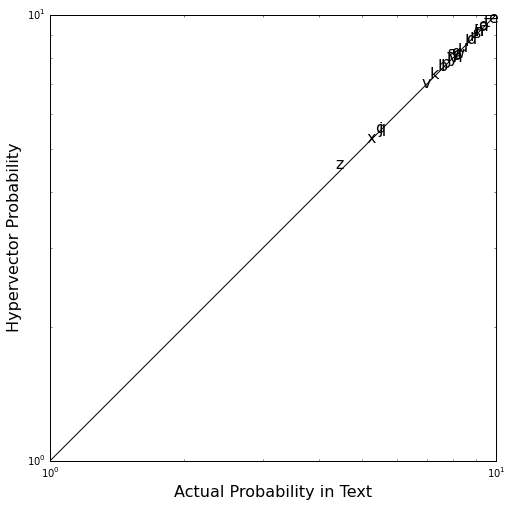

In [11]:
figure(figsize=(8,8))
cla()
plot([1e-3, 10], [1e-3, 10], 'k')

for i,l in enumerate(random_idx.alphabet):
    if letter_prob[i] < 1e-7:
        continue
        
    text(np.log(letter_counts[i]), abs(hyp_prob_log[i]), l, fontsize=16) # abs to deal with potential negatives
ax = gca()
ax.set_xlim([1e0, 10])
ax.set_xscale('log')
ax.set_ylim([1e0, 10])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


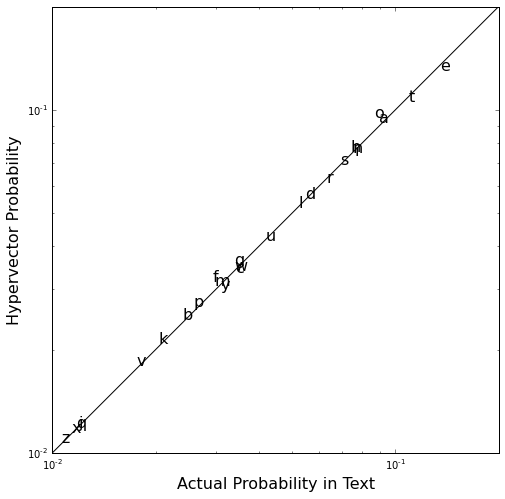

In [12]:
figure(figsize=(8,8))
cla()
plot([1e-2, 0.2], [1e-2, 0.2], 'k')

for i,l in enumerate(random_idx.alphabet):
    text(letter_prob[i]+1e-2, np.exp(abs(hyp_prob_log[i]))/len(alice_text)+1e-2, l, fontsize=16) # abs to deal with potential negatives
ax = gca()
ax.set_xlim([1e-2, 0.2])
ax.set_xscale('log')
ax.set_ylim([1e-2, 0.2])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


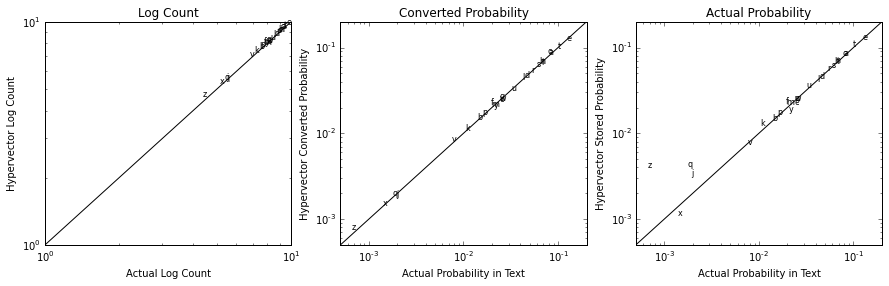

In [59]:
figure(figsize=(15,4))
cla()
subplot(131)
plot([1e-1, 1e1], [1e-1, 1e1], 'k')
subplot(132)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')
subplot(133)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')

for i,ll in enumerate(random_idx.alphabet):
    if letter_counts[i] < 1:
        continue
    
    subplot(131)
    text(np.log(letter_counts[i]+1e-1), abs(hyp_prob_log[i])+1e-1, ll, fontsize=8)
    #plot(np.log(letter_counts3[i]+1e-5), abs(letter_vals_log3[i])+1e-5, '.r')
    subplot(132)
    text(letter_counts[i]/len(alice_text)+1e-5, np.exp(abs(hyp_prob_log[i]))/len(alice_text), ll, fontsize=8)
    subplot(133)
    text(letter_counts[i]/len(alice_text)+1e-5, abs(hyp_prob1[i])+1e-5, ll, fontsize=8) # abs to deal with potential negatives

ax = subplot(131)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0, 1e1])
ax.set_ylim([1e0, 1e1])
title('Log Count')
xlabel('Actual Log Count')
ylabel('Hypervector Log Count')

ax2 = subplot(132)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([5e-4, 2e-1])
ax2.set_ylim([5e-4, 2e-1])
title('Converted Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Converted Probability')

ax3 = subplot(133)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim([5e-4, 2e-1])
ax3.set_ylim([5e-4, 2e-1])
title('Actual Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Stored Probability')


### Storing bigrams in hypervectors

In [13]:
ngram = 2
ngram_vector = np.ones(N)
alice_vector2 = np.zeros(N)

for i in range(ngram-1):
    lidx = random_idx.alphabet.find(alice_text[i])
    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]

for i,l in enumerate(alice_text[(ngram-1):]):
    lidx = random_idx.alphabet.find(l)

    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]
    
    alice_vector2 += ngram_vector
    
    # remove the first letter of the ngram
    fidx = random_idx.alphabet.find(alice_text[i])

    ngram_vector = ngram_vector * np.roll(letter_vectors[fidx, :], (ngram-1))
    
    
alice_vector2 = alice_vector2 / len(alice_text)


The bigram hypervector does not contain any information about the unigram statistics (because we did not store this information). 


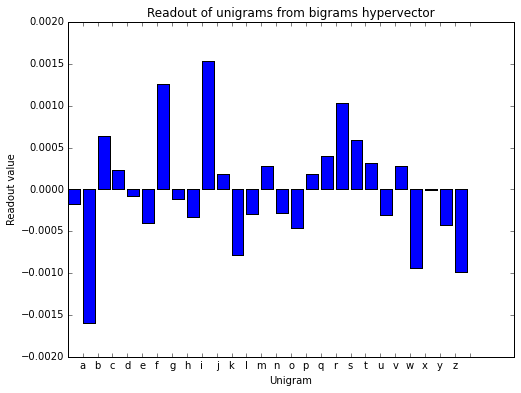

In [14]:
hyp_prob2 = np.dot(letter_vectors, alice_vector2.T) / N
figure(figsize=(8,6));

bar(arange(len(hyp_prob2)), hyp_prob2)

ax = gca()

ax.set_xticks(arange(len(random_idx.alphabet))+1)
th = ax.set_xticklabels(list(random_idx.alphabet))

title('Readout of unigrams from bigrams hypervector')
xlabel('Unigram');
ylabel('Readout value')

In [15]:
letter_vals2 = np.zeros(len(random_idx.alphabet)**2)
letter_counts2 = np.zeros(len(random_idx.alphabet)**2)
letter_pairs = []
c = 0

for i, letter1 in enumerate(random_idx.alphabet):
    for j, letter2 in enumerate(random_idx.alphabet):
        
        letter_pairs.append(letter1+letter2)
        
        letter_counts2[c] = alice_text.count(letter_pairs[c])
        
        vector = np.roll(letter_vectors[i,:], 1) * letter_vectors[j,:]
        
        letter_vals2[c] = np.dot(vector, alice_vector2.T) / N
        c+=1

#%%
letter_prob2 = letter_counts2 / sum(letter_counts2)


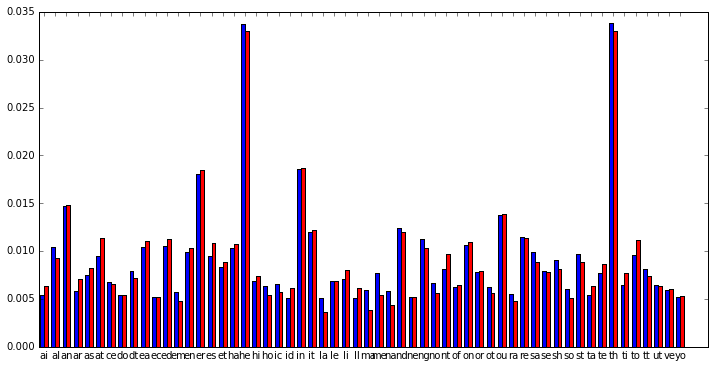

In [16]:
figure(figsize=(12,6))

sig_idx = find(letter_vals2 > 0.005)

b1=bar(arange(len(letter_vals2[sig_idx]))+0.15, letter_vals2[sig_idx], width=0.35, color='b')
b2=bar(arange(len(letter_prob2[sig_idx]))+0.5, letter_prob2[sig_idx], width=0.35, color='r')

ax = gca()

ax.set_xticks(arange(len(letter_vals2[sig_idx]))+0.5)

pair_labels = []
for i in sig_idx:
    pair_labels.append(letter_pairs[i])
    
t1 = ax.set_xticklabels(pair_labels)

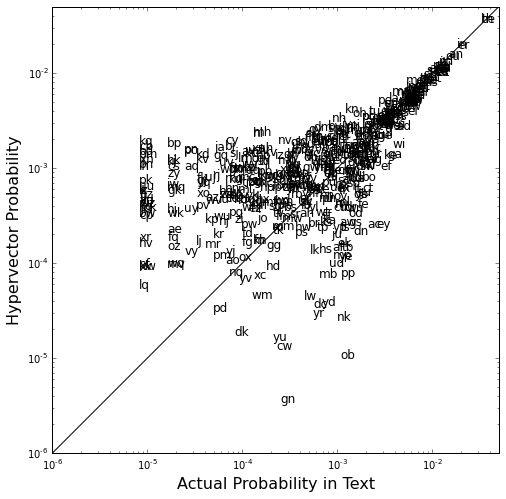

In [17]:
figure(figsize=(8,8))
cla()
plot([1e-7, 0.2], [1e-7, 0.2], 'k')

for i,ll in enumerate(letter_pairs):
    if letter_prob2[i] < 1e-7:
        continue
        
    text(letter_prob2[i], abs(letter_vals2[i]), ll, fontsize=12) # abs to deal with potential negatives
    
ax = gca()
ax.set_xlim([1e-6, 0.05])
ax.set_xscale('log')
ax.set_ylim([1e-6, 0.05])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Probability', fontsize=16)


In [18]:
ngram = 2
ngram_vector = np.ones(N)
alice_vector_log2 = np.zeros(N)

for i in range(ngram-1):
    lidx = random_idx.alphabet.find(alice_text[i])
    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]

for i,l in enumerate(alice_text[(ngram-1):]):
    lidx = random_idx.alphabet.find(l)

    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]
    
    ngram_val = np.dot(ngram_vector, alice_vector_log2.T) / N
    alice_vector_log2 += 1.0 / (np.exp(ngram_val)) * ngram_vector
    
    # remove the first letter of the ngram
    fidx = random_idx.alphabet.find(alice_text[i])

    ngram_vector = ngram_vector * np.roll(letter_vectors[fidx, :], (ngram-1))
    

In [19]:
letter_vals_log2 = np.zeros(len(random_idx.alphabet)**2)
letter_counts2 = np.zeros(len(random_idx.alphabet)**2)
letter_pairs = []
c = 0

for i, letter1 in enumerate(random_idx.alphabet):
    for j, letter2 in enumerate(random_idx.alphabet):
        
        letter_pairs.append(letter1+letter2)
        
        letter_counts2[c] = alice_text.count(letter_pairs[c])
        
        vector = np.roll(letter_vectors[i,:], 1) * letter_vectors[j,:]
        
        letter_vals_log2[c] = np.dot(vector, alice_vector_log2.T) / N
        c+=1

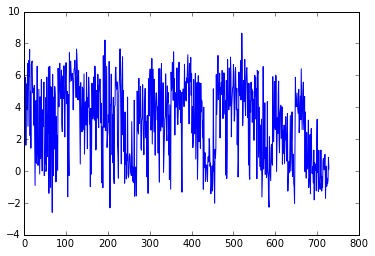

In [40]:
plot(letter_vals_log2)

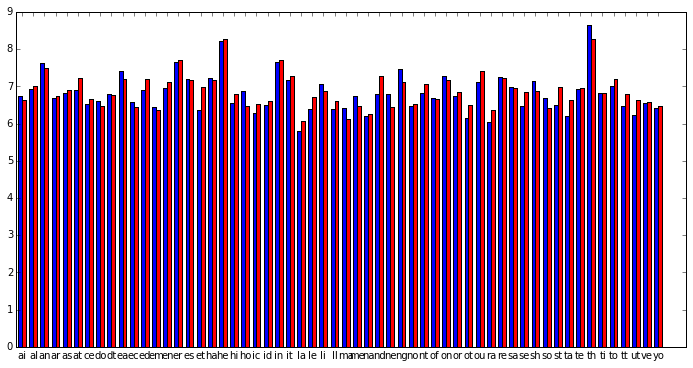

In [20]:
figure(figsize=(12,6))

sig_idx = find(letter_vals2 > 0.005)

b1=bar(arange(len(letter_vals_log2[sig_idx]))+0.15, letter_vals_log2[sig_idx], width=0.35, color='b')
b2=bar(arange(len(letter_counts2[sig_idx]))+0.5, np.log(letter_counts2[sig_idx]), width=0.35, color='r')

ax = gca()

ax.set_xticks(arange(len(letter_vals2[sig_idx]))+0.5)

pair_labels = []
for i in sig_idx:
    pair_labels.append(letter_pairs[i])
    
t1 = ax.set_xticklabels(pair_labels)

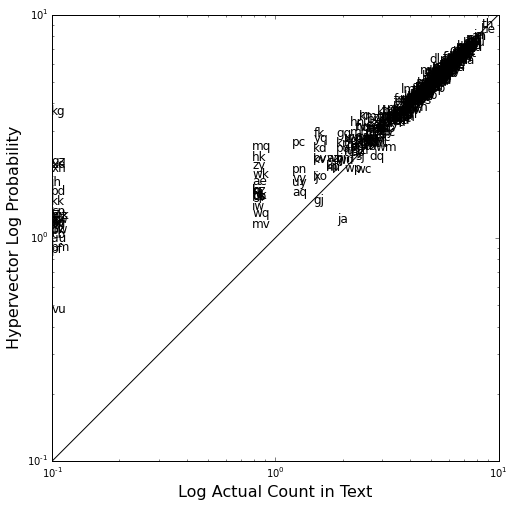

In [21]:
figure(figsize=(8,8))
cla()
plot([0.1, 10], [0.1, 10], 'k')

for i,ll in enumerate(letter_pairs):
    if letter_counts2[i] < 1:
        continue
        
    text(np.log(letter_counts2[i])+1e-1, abs(letter_vals_log2[i])+1e-1, ll, fontsize=12) # abs to deal with potential negatives
    
ax = gca()
#ax.set_xlim([1e-1, 1e1])
ax.set_xscale('log')
#ax.set_ylim([1e-1, 1e1])
ax.set_yscale('log')

xlabel('Log Actual Count in Text', fontsize=16)
ylabel('Hypervector Log Probability', fontsize=16)

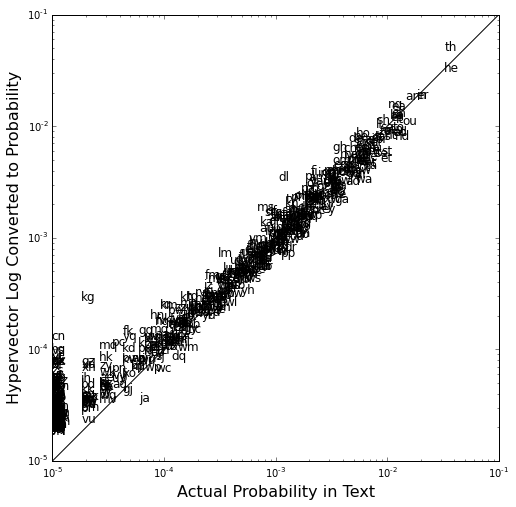

In [22]:
figure(figsize=(8,8))
cla()
plot([1e-5, 1e-1], [1e-5, 1e-1], 'k')

for i,ll in enumerate(letter_pairs):        
    text(letter_counts2[i]/len(alice_text)+1e-5, np.exp(abs(letter_vals_log2[i]))/len(alice_text)+1e-5, ll, fontsize=12) # abs to deal with potential negatives
    
ax = gca()
ax.set_xlim([1e-5, 1e-1])
ax.set_xscale('log')
ax.set_ylim([1e-5, 1e-1])
ax.set_yscale('log')

xlabel('Actual Probability in Text', fontsize=16)
ylabel('Hypervector Log Converted to Probability', fontsize=16)

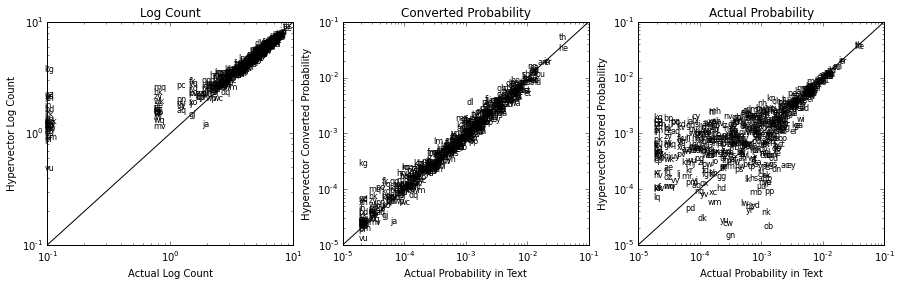

In [61]:
figure(figsize=(15,4))
cla()
subplot(131)
plot([1e-1, 1e1], [1e-1, 1e1], 'k')
subplot(132)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')
subplot(133)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')

for i,ll in enumerate(letter_pairs):
    if letter_counts2[i] < 1:
        continue
    
    subplot(131)
    text(np.log(letter_counts2[i]+1e-1), abs(letter_vals_log2[i])+1e-1, ll, fontsize=8)
    #plot(np.log(letter_counts3[i]+1e-5), abs(letter_vals_log3[i])+1e-5, '.r')
    subplot(132)
    text(letter_counts2[i]/len(alice_text)+1e-5, np.exp(abs(letter_vals_log2[i]))/len(alice_text), ll, fontsize=8)
    subplot(133)
    text(letter_counts2[i]/len(alice_text)+1e-5, abs(letter_vals2[i])+1e-5, ll, fontsize=8) # abs to deal with potential negatives

ax = subplot(131)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-1, 1e1])
ax.set_ylim([1e-1, 1e1])
title('Log Count')
xlabel('Actual Log Count')
ylabel('Hypervector Log Count')

ax2 = subplot(132)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-5, 1e-1])
ax2.set_ylim([1e-5, 1e-1])
title('Converted Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Converted Probability')

ax3 = subplot(133)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim([1e-5, 1e-1])
ax3.set_ylim([1e-5, 1e-1])
title('Actual Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Stored Probability')


In [25]:
ngram = 3
ngram_vector = np.ones(N)
alice_vector3 = np.zeros(N)
alice_vector_log3 = np.zeros(N)

for i in range(ngram-1):
    lidx = random_idx.alphabet.find(alice_text[i])
    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]

for i,l in enumerate(alice_text[(ngram-1):]):
    lidx = random_idx.alphabet.find(l)

    ngram_vector = np.roll(ngram_vector, 1) * letter_vectors[lidx, :]
    
    alice_vector3 += ngram_vector
    
    ngram_val = np.dot(ngram_vector, alice_vector_log3.T) / N
    alice_vector_log3 += 1.0 / (np.exp(abs(ngram_val))) * ngram_vector
    
    # remove the first letter of the ngram
    fidx = random_idx.alphabet.find(alice_text[i])

    ngram_vector = ngram_vector * np.roll(letter_vectors[fidx, :], (ngram-1))
   

In [27]:
letter_vals_log3 = np.zeros(len(random_idx.alphabet)**3)
letter_vals3 = np.zeros(len(random_idx.alphabet)**3)
letter_counts3 = np.zeros(len(random_idx.alphabet)**3)

letter_trigrams = []
c = 0

for i, letter1 in enumerate(random_idx.alphabet):
    for j, letter2 in enumerate(random_idx.alphabet):
        for k, letter3 in enumerate(random_idx.alphabet):
            
            letter_trigrams.append(letter1+letter2+letter3)
        
            letter_counts3[c] = alice_text.count(letter_trigrams[c])
        
            vector = np.roll(letter_vectors[i,:], 2) * np.roll(letter_vectors[j,:], 1) * letter_vectors[k,:]
            
            letter_vals3[c] = np.dot(vector, alice_vector3.T) / N
            letter_vals_log3[c] = np.dot(vector, alice_vector_log3.T) / N
            c+=1

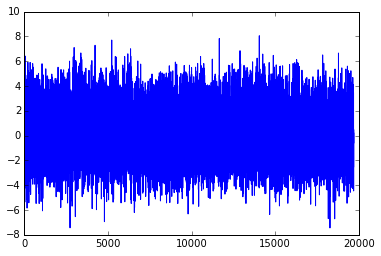

In [63]:
plot(letter_vals_log3)

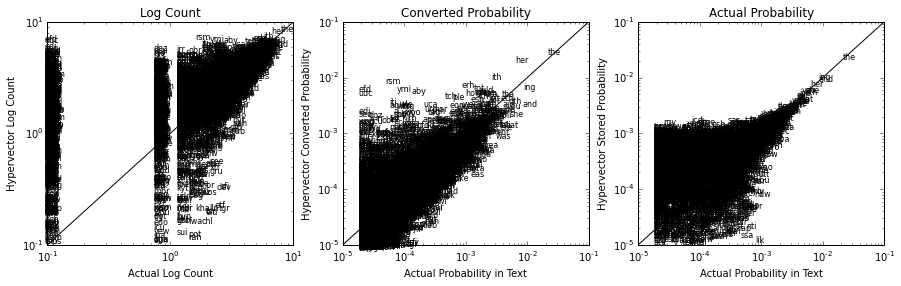

In [98]:
figure(figsize=(15,4))
cla()
subplot(131)
plot([1e-1, 1e1], [1e-1, 1e1], 'k')
subplot(132)
plot([1e-5, 1e-1], [1e-5, 1e-1], 'k')
subplot(133)
plot([1e-5, 1e-1], [1e-5, 1e-1], 'k')

for i,ll in enumerate(letter_trigrams):
    if letter_counts3[i] < 1:
        continue
    
    subplot(131)
    text(np.log(letter_counts3[i]+1e-1), abs(letter_vals_log3[i])+1e-1, ll, fontsize=8)
    #plot(np.log(letter_counts3[i]+1e-5), abs(letter_vals_log3[i])+1e-5, '.r')
    subplot(132)
    text(letter_counts3[i]/len(alice_text)+1e-5, np.exp(abs(letter_vals_log3[i]))/len(alice_text), ll, fontsize=8)
    subplot(133)
    text(letter_counts3[i]/len(alice_text)+1e-5, abs(letter_vals3[i])/len(alice_text)+1e-5, ll, fontsize=8) # abs to deal with potential negatives

ax = subplot(131)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-1, 1e1])
ax.set_ylim([1e-1, 1e1])
title('Log Count')
xlabel('Actual Log Count')
ylabel('Hypervector Log Count')

ax2 = subplot(132)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-5, 1e-1])
ax2.set_ylim([1e-5, 1e-1])
title('Converted Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Converted Probability')

ax3 = subplot(133)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlim([1e-5, 1e-1])
ax3.set_ylim([1e-5, 1e-1])
title('Actual Probability')
xlabel('Actual Probability in Text')
ylabel('Hypervector Stored Probability')


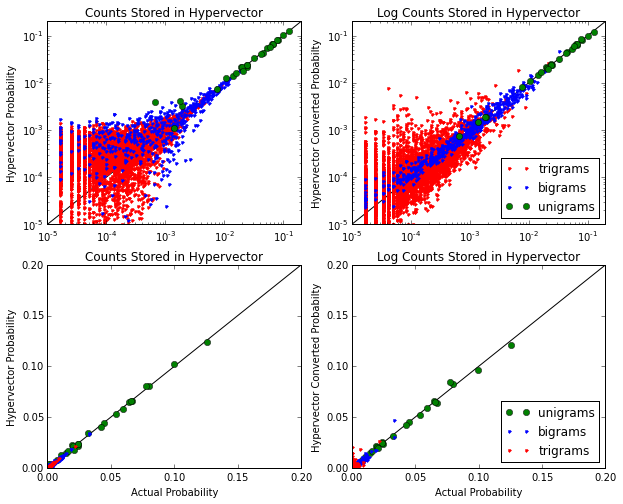

In [107]:
figure(figsize=(10,8))

ax1 = subplot(221)
plot([1e-5,2e-1], [1e-5, 2e-1], 'k')

plot(letter_counts3/len(alice_text), abs(letter_vals3)/len(alice_text), '.r')
plot(letter_counts2/len(alice_text), abs(letter_vals2), '.b')
plot(letter_counts/len(alice_text), abs(hyp_prob1), 'og')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([1e-5, 2e-1])
ax1.set_ylim([1e-5, 2e-1])
title('Counts Stored in Hypervector')
ylabel('Hypervector Probability')

ax2 = subplot(222)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')

plot(letter_counts3/len(alice_text), np.exp(abs(letter_vals_log3))/len(alice_text), '.r', label='trigrams')
plot(letter_counts2/len(alice_text), np.exp(abs(letter_vals_log2))/len(alice_text), '.b', label='bigrams')
plot(letter_counts/len(alice_text), np.exp(abs(hyp_prob_log))/len(alice_text), 'og', label='unigrams')

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e-5, 2e-1])
ax2.set_ylim([1e-5, 2e-1])
title('Log Counts Stored in Hypervector')
ylabel('Hypervector Converted Probabilty')
legend(loc='lower right')

ax3 = subplot(223)
plot([1e-5,2e-1], [1e-5, 2e-1], 'k')

plot(letter_counts/len(alice_text), abs(hyp_prob1), 'og')
plot(letter_counts2/len(alice_text), abs(letter_vals2), '.b')
plot(letter_counts3/len(alice_text), abs(letter_vals3)/len(alice_text), '.r')

title('Counts Stored in Hypervector')
xlabel('Actual Probability')
ylabel('Hypervector Probability')

ax4= subplot(224)
plot([1e-5, 2e-1], [1e-5, 2e-1], 'k')
plot(letter_counts/len(alice_text), np.exp(abs(hyp_prob_log))/len(alice_text), 'og', label='unigrams')
plot(letter_counts2/len(alice_text), np.exp(abs(letter_vals_log2))/len(alice_text), '.b', label='bigrams')
plot(letter_counts3/len(alice_text), np.exp(abs(letter_vals_log3))/len(alice_text), '.r', label='trigrams')

title('Log Counts Stored in Hypervector')
xlabel('Actual Probability')
ylabel('Hypervector Converted Probabilty')
legend(loc='lower right')

In [104]:
trigram_log_error = np.sqrt(np.sum((letter_counts3/len(alice_text) - np.exp(abs(letter_vals_log3))/len(alice_text)) ** 2))

bigram_log_error = np.sqrt(np.sum((letter_counts2/len(alice_text) - np.exp(abs(letter_vals_log2))/len(alice_text)) ** 2))

unigram_log_error = np.sqrt(np.sum((letter_counts/len(alice_text) - np.exp(abs(hyp_prob_log))/len(alice_text)) ** 2))

trigram_error = np.sqrt(np.sum((letter_counts3/len(alice_text) - abs(letter_vals3)/len(alice_text)) **2))
bigram_error = np.sqrt(np.sum((letter_counts2/len(alice_text) - abs(letter_vals2)) **2))
unigram_error = np.sqrt(np.sum((letter_counts/len(alice_text) - abs(hyp_prob1)) **2))

print unigram_error, unigram_log_error
print bigram_error, bigram_log_error
print trigram_error, trigram_log_error

0.00882809519772 nan
0.0216598948406 nan
0.0547352573124 nan


In [101]:
trigram_log_ratio = np.sqrt(np.sum((1 - letter_counts3/len(alice_text) / np.exp(abs(letter_vals_log3))/len(alice_text)) ** 2))

bigram_log_ratio = np.sqrt(np.sum((1 - letter_counts2/len(alice_text) / np.exp(abs(letter_vals_log2))/len(alice_text)) ** 2))

unigram_log_ratio = np.sqrt(np.sum((1 - letter_counts/len(alice_text) / np.exp(abs(hyp_prob_log))/len(alice_text)) ** 2))

trigram_ratio = np.sqrt(np.sum((1 - letter_counts3/len(alice_text) / abs(letter_vals3)/len(alice_text)) **2))
bigram_ratio = np.sqrt(np.sum((1 - letter_counts2/len(alice_text) / abs(letter_vals2)) **2))
unigram_ratio = np.sqrt(np.sum((1 - letter_counts/len(alice_text) / abs(hyp_prob1)) **2))

print unigram_ratio, unigram_log_ratio
print bigram_ratio, bigram_log_ratio
print trigram_ratio, trigram_log_ratio

1.5394306837 5.19615242237
147.43148418 26.9999999988
140.296115409 140.296115411


## Storing arbitrary sequences of fixed number of tokens

Lets do an experiment and see how many letters we really can store in the hypervector. It will be important to test different dimensionality of the hypervectors and compare how the capacity scales with the dimensionality. But there are also other things to consider:

- the dimensionality of the input
- the sparsity of the input
- input statistics -- structured sentences vs random letters?
- permutation vs random orthogonal vs random

The basic strategy of testing the hypervector I'm considering is to have three read-out units: one that is reads out the last input, another that reads out a fixed input away, and another that reads out the first input always. Then we will just add one letter at a time to the hypervector, and read it out as long as possible.


In [76]:
def test_capacity_independent_roll(N, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(len(random_idx.alphabet))
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(len(random_idx.alphabet))

        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

        lli = random_idx.alphabet[int(lidx_last_input[i])]
        liK = random_idx.alphabet[int(lidx_input_K[i])]
        lfi = random_idx.alphabet[int(lidx_first_input[i])]

        #print '%03d:' % i, l, lli, liK, lfi

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [77]:
test_N = [100, 500, 1000, 5000, 10000]
#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_independent_roll(N)
        
        run_id.append(r)
        run_N.append(N)
        lidx_all.append(lidx)
        lidx_li_all.append(lidx_li)
        lidx_iK_all.append(lidx_iK)
        lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-independent_roll-N=' + str(len(test_N)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.202861070633
Duration:  0.324317932129
Duration:  0.507525205612
Duration:  1.82562494278
Duration:  3.46808791161
1
Duration:  0.169721126556
Duration:  0.325018882751
Duration:  0.514200925827
Duration:  1.84116506577
Duration:  3.47263908386
2
Duration:  0.169879198074
Duration:  0.325052976608
Duration:  0.509176969528
Duration:  1.81727194786
Duration:  3.47469592094
3
Duration:  0.168730020523
Duration:  0.327309131622
Duration:  0.50960111618
Duration:  1.81709504128
Duration:  3.48710489273
4
Duration:  0.171179056168
Duration:  0.324890851974
Duration:  0.507117033005
Duration:  1.81789398193
Duration:  3.48937487602
data/hypervector_capacity-independent_roll-N=5-r=5-n160402.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [ ]:
h = np.load('data/hypervector_capacity-independent_roll-N=5-r=5-n160330.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [78]:
run_id = np.array(run_id)
run_N = np.array(run_N)

uN = unique(run_N)
uN = np.array([100, 500, 1000, 5000, 10000])
K=5

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uN)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uN)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uN)))

for iN, idxN in enumerate(uN):
    idxs = find(run_N==idxN)
    for i in idxs:
        li_mean[:,iN] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iN] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iN] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


(0, 900)

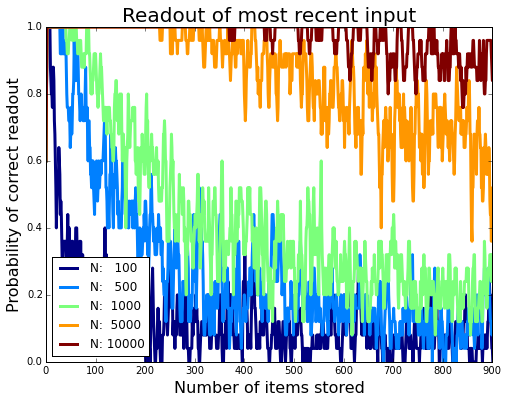

In [79]:
figure(figsize=(8,6))
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 900])

### Recurrent Neural Networks and Hypervectors

This is a set of experiments testing the capacity of hypervectors with extrapolation to recurrent neural networks. 

This is to answer some of these questions:
1. What is the relationship with capacity and dimensionality of the hypervector?
2. What is the relationship with capacity and dimensionality of the input?
3. Is there any relationship with capacity and input statistics? i.e. natural language vs. random letters
4. What is the difference between permutation, random orthogonal, and random normal weight matrices?


In [ ]:
def random_orthogonal(n):
    a = np.random.random((n,n))
    q, r = np.linalg.qr(a)
    
    return q


In [ ]:
def test_capacity_natural_ro(N, ro, K=5):
    letter_vectors = 2 * (np.random.randn(len(random_idx.alphabet), N) > 0) - 1

    letter_sequence='''this hypervector is going to contain a lot of letters at some point it will run out of capacity and it should 
    no longer be capable of storing patterns indefinitely the dimensionality of the hypervectors will play an important role in its 
    capacity understanding the relationship between dimensionality and capacity is extremely important and wow you can totally put a
    lot more letters in the hypervector than i expected with one thousand dimensions you can easily store one hundred letters in the 
    hypervector with no loss and using a totally random orthogonal matrix this is pretty crazy it seems to be quite noisy for a while 
    but it still retains some information capacity i had to go back and add these letters to push it further and get to the point where 
    it was clearly going haywire the other thing is that the values of the hypervector are also continually increasing'''

    hypercapacity = np.zeros(N)

    # we have ro, but lets also store read out matrices
    last_input = np.linalg.matrix_power(ro, -1)
    input_K = np.linalg.matrix_power(ro, -K)
    first_input = np.linalg.matrix_power(ro, -1) # this one we will build up continuously

    tstart = time.time()
    lidx = np.zeros(len(letter_sequence))
    lidx[0] = random_idx.alphabet.find(letter_sequence[0])
    hypercapacity = np.dot(ro, hypercapacity) + letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(len(letter_sequence))
    lidx_input_K = np.zeros(len(letter_sequence))
    lidx_first_input = np.zeros(len(letter_sequence))

    for i,l in enumerate(letter_sequence[1:]):
        lidx[i+1] = random_idx.alphabet.find(l)

        hypercapacity = np.dot(ro, hypercapacity) + letter_vectors[lidx[i+1], :]

        v_last_input = np.dot(last_input, hypercapacity)
        v_input_K = np.dot(input_K, hypercapacity) # we can still do this less than K, it will just be noise
        v_first_input = np.dot(first_input, hypercapacity)
        first_input = np.dot(last_input, first_input) # we have to continually update this readout matrix

        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

        lli = random_idx.alphabet[int(lidx_last_input[i])]
        liK = random_idx.alphabet[int(lidx_input_K[i])]
        lfi = random_idx.alphabet[int(lidx_first_input[i])]

        #print '%03d:' % i, l, lli, liK, lfi

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [ ]:
#test_N = [100, 200, 500]
test_N = [100, 500, 1000, 5000, 10000]
runs = 5

run_id = []
run_N = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_natural_ro(N, random_orthogonal(N))
        
        run_id.append(r)
        run_N.append(N)
        lidx_all.append(lidx)
        lidx_li_all.append(lidx_li)
        lidx_iK_all.append(lidx_iK)
        lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-natural_ro-N=' + str(len(test_N)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


In [80]:
h = np.load('data/hypervector_capacity-natural_ro-N=5-r=5-n160315.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [81]:
run_id = np.array(run_id)
run_N = np.array(run_N)

uN = unique(run_N)
K=5

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uN)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uN)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uN)))

for iN, idxN in enumerate(uN):
    idxs = find(run_N==idxN)
    for i in idxs:
        li_mean[:,iN] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iN] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iN] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


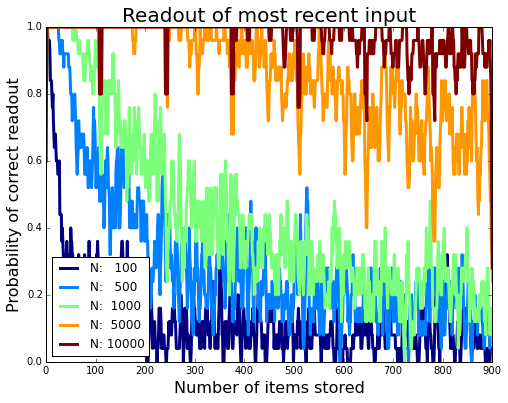

In [82]:
figure(figsize=(8,6))
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

**Figure 1: Capacity of hyperrnn.** A string of 900 characters was sequentially stored in a hyper-rnn with random orthogonal weights. The readout of the most recent input falls off at different rates depending on the dimensionality. A 1000-D hyper-rnn can store over 50 memories of 27 characters. 

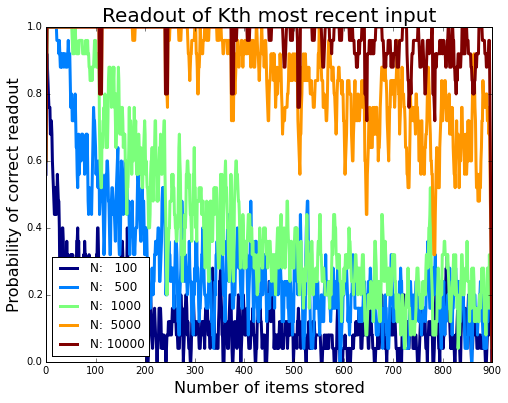

In [83]:
figure(figsize=(8,6))
cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left')
title('Readout of Kth most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

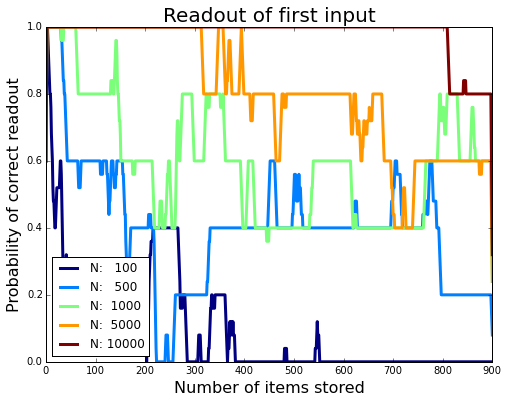

In [84]:
figure(figsize=(8,6))
cm=get_cmap('jet', fi_mean.shape[1])

for i in range(fi_mean.shape[1]):
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="N: %5i" % test_N[i])
    
legend(loc='lower left')
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)

### Capacity and dimensionality of tokens

Another big factor that could effect the capacity of the hypervector is the dimensionality of the tokens. In the above examples, we have been storing the fixed tokens of 'abcd...xyz '. The hypervector or rnn would receive one of these 27 possibilities at each time point. 

We will call this 27 $D$. 

We can change $D$ by adding more letter tokens. e.g. we could include all lower and upper case letters and have 53 tokens, we could include all punctuation and have even more. 

We can also note a potential relationship between sparsity of the input and $D$. Note that the input is always 1-sparse of $D$, so the input structure is 1-sparse and has a dimensionality of $D$.  We could imagine a different kind of input stream into an RNN, where the input is 2-sparse: i.e. you get two letters simultaneously. However, this can be translated into a 1-sparse representation with $D^2$ number of tokens. This could be used to fundamentally connect an input stream's dimensionality with its sparsity.





In [85]:
def test_capacity_D(N, D, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [86]:
test_N = [1000]
test_D = [2, 4, 8, 16, 32, 64, 128]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for N in test_N:
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_D(N, D)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity-D-N=' + str(len(test_N)) + '-D=' + str(len(test_D)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.253890037537
Duration:  0.242411851883
Duration:  0.29274392128
Duration:  0.382584095001
Duration:  0.552433013916
Duration:  0.877038002014
Duration:  1.52141404152
1
Duration:  0.219182014465
Duration:  0.244474887848
Duration:  0.28799700737
Duration:  0.380621910095
Duration:  0.551037073135
Duration:  0.876413106918
Duration:  1.52580595016
2
Duration:  0.218289136887
Duration:  0.238706827164
Duration:  0.285948038101
Duration:  0.375512123108
Duration:  0.548384904861
Duration:  0.873522043228
Duration:  1.51836705208
3
Duration:  0.221457004547
Duration:  0.242881059647
Duration:  0.290236949921
Duration:  0.383260011673
Duration:  0.565527915955
Duration:  0.881176948547
Duration:  1.52256989479
4
Duration:  0.220360040665
Duration:  0.242449998856
Duration:  0.285618066788
Duration:  0.373903989792
Duration:  0.551211833954
Duration:  0.879148960114
Duration:  1.52673602104
data/hypervector_capacity-D-N=1-D=7-r=5-n160402.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [87]:
h = np.load('data/hypervector_capacity-D-N=1-D=7-r=5-n160330.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']

In [88]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


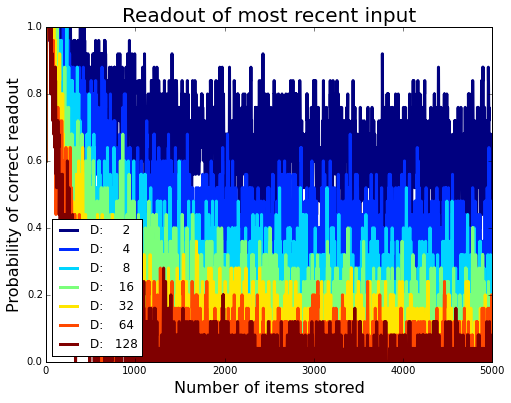

In [89]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


(0, 300)

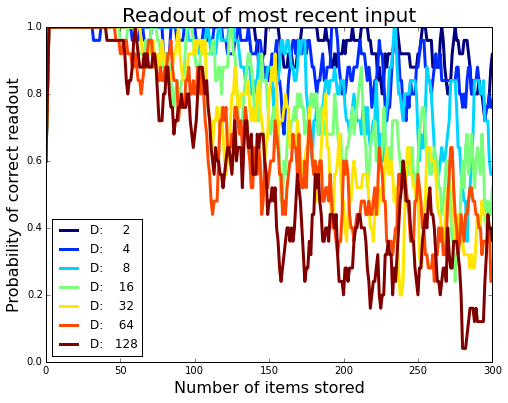

In [90]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 300])

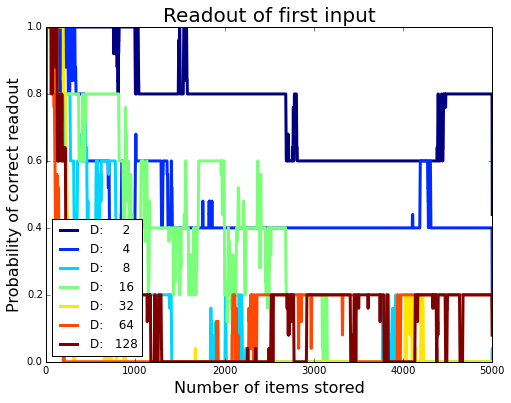

In [91]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


### Hypervectors with decay

The roll operation or the random orthogonal matrix has an important property defined by the eigenvalues. For roll or random orth matrices the eigenvalues are all 1, which means that the hypervector/rnn will attempt to store all information from all time. We have seen how the chaos will build up until no information can be stored. This means that the most recent input or the first input have the same likelihoods of being correctly read out. 

In the context of RNNs this is harmful. This is because an RNN will fill up at some point, and chaos will dominate its dynamics instead of information. When this happens, even the most recent items added to the RNN will be undecodable. This means that the RNN has filled up, and it is over capacity.

A more useful RNN could have memory only for a finite amount of history. In this case, we could imagine the weight matrix having eigenvalue slightly less than 1, or we decay the hypervector by a small amount each time step. This type of decay will exponentially decrease the information energy in the hypervector, and should enable storage of recent sequences indefinitely, but perhaps at the cost of not being able to store quite as much.


In [92]:
def test_capacity_decay(N, D, decay=1, K=5, trials=5e3):
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1

    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)

    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)

        hypercapacity = decay * np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))
        
        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

In [93]:
test_N = [2000]
test_D = [2, 4, 8, 16, 32, 64]

#test_N = [100, 300, 900, 2700, 8100, 24300]
runs = 5

run_id = []
run_N = []
run_D = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

K=20

for r in range(runs):
    print r
    for N in test_N:
        for D in test_D:
            lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_decay(N, D, decay=0.99, K=K)
        
            run_id.append(r)
            run_N.append(N)
            run_D.append(D)
            lidx_all.append(lidx)
            lidx_li_all.append(lidx_li)
            lidx_iK_all.append(lidx_iK)
            lidx_fi_all.append(lidx_fi)
        
filename = 'data/hypervector_capacity_decay-N=' + str(len(test_N)) + '-D=' + str(len(test_D)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all)


0
Duration:  0.399141073227
Duration:  0.479276895523
Duration:  0.838968992233
Duration:  1.25110507011
Duration:  2.23205208778
Duration:  4.20040297508
1
Duration:  0.427934169769
Duration:  0.468324899673
Duration:  0.826719999313
Duration:  1.23850297928
Duration:  2.11777496338
Duration:  4.2521879673
2
Duration:  0.431679010391
Duration:  0.464468955994
Duration:  0.835875988007
Duration:  1.27722501755
Duration:  2.12497615814
Duration:  4.30201911926
3
Duration:  0.447697877884
Duration:  0.464900016785
Duration:  0.835125207901
Duration:  1.38713693619
Duration:  2.14272403717
Duration:  3.9004201889
4
Duration:  0.442356824875
Duration:  0.480224132538
Duration:  0.840226888657
Duration:  1.34503221512
Duration:  2.18943095207
Duration:  4.10835909843
data/hypervector_capacity_decay-N=1-D=6-r=5-n160402.npz


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: Depre

In [94]:
run_id = np.array(run_id)
run_D = np.array(run_D)

uD = unique(run_D)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(uD)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(uD)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(uD)))

for iD, idxD in enumerate(uD):
    idxs = find(run_D==idxD)
    for i in idxs:
        li_mean[:,iD] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,iD] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')                             
        fi_mean[:,iD] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


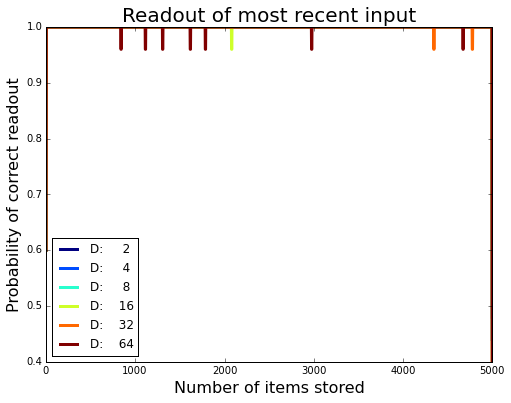

In [95]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


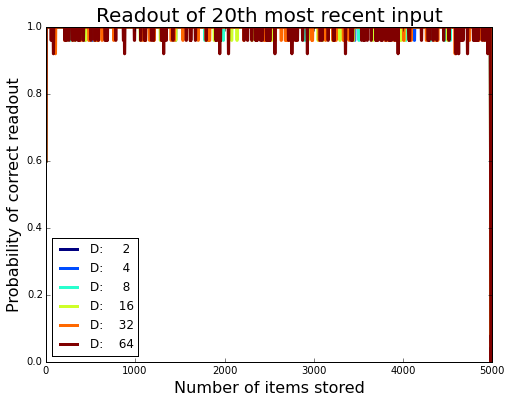

In [96]:
figure(figsize=(8,6))

cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of %dth most recent input' % K, fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)


(0, 1000)

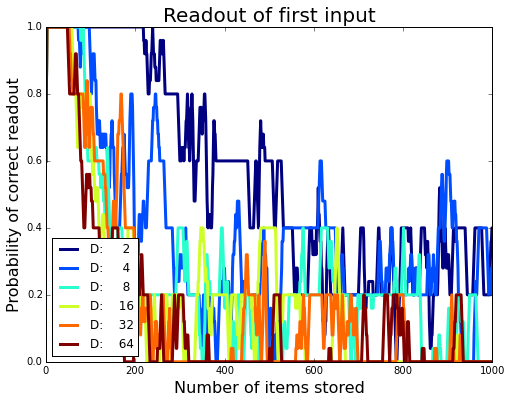

In [97]:
figure(figsize=(8,6))

cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), color=cm(i), lw=3, label="D: %5i" % test_D[i])
    
legend(loc='lower left');
title('Readout of first input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
xlim([0, 1000])